# Dinâmica 2 - Data Science

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving nyflights.csv to nyflights (1).csv


KeyboardInterrupt: ignored

In [35]:
import seaborn as sns

In [4]:
df = pd.read_csv('nyflights.csv')
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


## 1. Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas? 


In [16]:
# atraso na partida
atraso_select = df.loc[:, ["dep_delay"]]


dep_delay    328521
dtype: int64

In [17]:
atraso_select.isnull().sum()


dep_delay    8255
dtype: int64

In [20]:
# retira registros sem valor
df2 = atraso_select.dropna()
df2

,dep_delay
0,2.0
1,4.0
2,2.0
3,-1.0
4,-6.0
...,...
336765,-5.0
336766,-10.0
336767,-5.0
336768,12.0


In [23]:
# atraso na partida
df3 = df2[df2['dep_delay']>120]
df3

,dep_delay
151,853.0
218,144.0
268,134.0
491,122.0
649,290.0
...,...
336579,158.0
336668,182.0
336724,158.0
336757,194.0


In [24]:
df3.describe()

,dep_delay
count,9723.000000
mean,186.983236
std,74.596836
min,121.000000
25%,139.000000
50%,166.000000
75%,210.000000
max,1301.000000


In [31]:
variancia = df3.var()
variancia

dep_delay    5564.687952
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

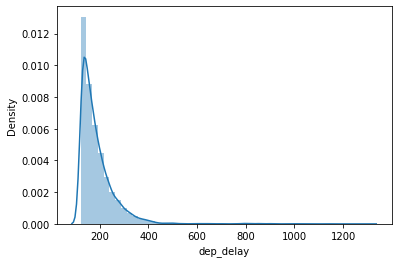

In [36]:
plt.figure()
sns.distplot(df3['dep_delay'])
plt.show

Text(0.0, 1.0, 'Gráfico Box-Plot dos Atrasos nos Vôos')

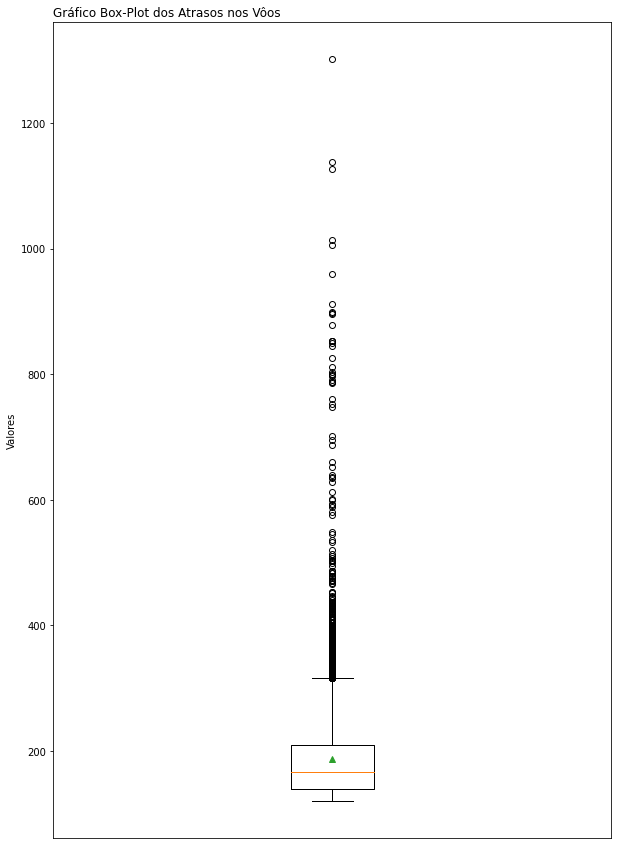

In [42]:
fig = plt.figure(figsize=(10,15))
plt.boxplot(df3['dep_delay'], showmeans = True)
plt.ylabel('Valores')


# Remove o valor do eixo x
plt.xticks([1], [''])

# Remove o tick do eixo x
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

plt.title('Gráfico Box-Plot dos Atrasos nos Vôos', loc = 'left')

## R:
### Em média os vôos atrasam em torno de 3h ou 187 minutos. E apesar de possuir vários outliers a maioria dos vôos atrasa menos de 300 minutos

### A variância é de 5564


## 2. Quais destinos geraram voos com o maior número de atrasos na partida? (5 piores | Considerar 5 minutos um atraso aceitável)


In [76]:
df5 = df[['dest','dep_delay']]
df5 = df5[df5['dep_delay']>5].sort_values(by='dep_delay')

In [78]:
df6 = df5.groupby(['dest'])['dep_delay'].count()
df6 = df6.sort_values().tail().index
df6

Index(['SFO', 'MCO', 'LAX', 'ATL', 'ORD'], dtype='object', name='dest')

## R: Os aeroportos com maior atraso são: SFO, MCO, LAX, ATL, ORD

## 3. Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos.

In [81]:
df_dest = df.loc[:, ['dest','air_time','distance']]
df_dest

,dest,air_time,distance
0,IAH,227.0,1400
1,IAH,227.0,1416
2,MIA,160.0,1089
3,BQN,183.0,1576
4,ATL,116.0,762
...,...,...,...
336771,DCA,NaN,213
336772,SYR,NaN,198
336773,BNA,NaN,764
336774,CLE,NaN,419


In [102]:
df_dest = df_dest.loc[(df_dest['dest'] == 'SFO') | (df_dest['dest'] == 'MCO') | (df_dest['dest'] == 'LAX') | (df_dest['dest'] == 'ATL') | (df_dest['dest'] == 'ORD')]
df_dest

,dest,air_time,distance,vel_media
4,ATL,116.0,762,394.137931
5,ORD,150.0,719,287.600000
8,MCO,140.0,944,404.571429
9,ORD,138.0,733,318.695652
12,LAX,345.0,2475,430.434783
...,...,...,...,...
336724,ATL,91.0,746,491.868132
336744,LAX,296.0,2475,501.689189
336751,LAX,298.0,2475,498.322148
336762,SFO,318.0,2565,483.962264


In [103]:
# velocidade_media = df['distance']/df['air_time']]
df_dest['vel_media']= df_dest['distance']/df_dest['air_time']*60
df_dest

,dest,air_time,distance,vel_media
4,ATL,116.0,762,394.137931
5,ORD,150.0,719,287.600000
8,MCO,140.0,944,404.571429
9,ORD,138.0,733,318.695652
12,LAX,345.0,2475,430.434783
...,...,...,...,...
336724,ATL,91.0,746,491.868132
336744,LAX,296.0,2475,501.689189
336751,LAX,298.0,2475,498.322148
336762,SFO,318.0,2565,483.962264


In [104]:
df_dest.dropna()

,dest,air_time,distance,vel_media
4,ATL,116.0,762,394.137931
5,ORD,150.0,719,287.600000
8,MCO,140.0,944,404.571429
9,ORD,138.0,733,318.695652
12,LAX,345.0,2475,430.434783
...,...,...,...,...
336724,ATL,91.0,746,491.868132
336744,LAX,296.0,2475,501.689189
336751,LAX,298.0,2475,498.322148
336762,SFO,318.0,2565,483.962264


In [107]:
df_dest2 = df_dest.groupby(['dest'])['vel_media'].describe().reset_index()
df_dest2

,dest,count,mean,std,min,25%,50%,75%,max
0,ATL,16837.0,405.182104,33.994256,254.318182,381.000000,406.909091,430.384615,703.384615
1,LAX,16026.0,452.799331,25.048269,337.500000,435.483871,451.656442,469.936709,540.000000
2,MCO,13967.0,422.385530,32.109714,265.116279,401.571429,425.864662,445.984252,529.345794
3,ORD,16566.0,381.130263,31.117499,217.878788,360.491803,382.434783,403.486239,495.862069
4,SFO,13173.0,448.541794,22.037254,316.653061,433.407821,448.439306,463.554217,521.694915


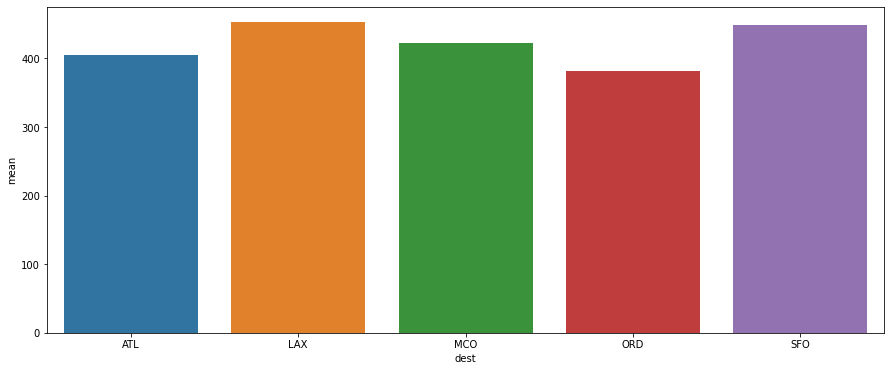

In [108]:
fig = plt.figure(figsize=(15,6))

sns.barplot(x=df_dest2['dest'], y=df_dest2['mean'])

# fig.plt.show()


### As velocidades médias dos 5 destinos que mais ocorrem atrasos são:

ATL	405.18 km/h </br>
LAX	452.79 km/h </br>
MCO	422.38 km/h </br>
ORD	381.13 km/h </br>
SFO	448.54 km/h </br>